In [3]:
# checking if the torch package is accessible in this jupter notebook and PyTorch can use the GPU

import torch

!python --version  # knowing the python version to see if PyTorch supports it.

print("Torch version:", torch.__version__)
print("\n")

if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the first available GPU
    print("GPU is available, using GPU for computations.")
    print(f"GPU name:{torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

Python 3.12.8
Torch version: 2.7.1+cu128


GPU is available, using GPU for computations.
GPU name:NVIDIA RTX 4000 Ada Generation


In wheat coccinellid detection project, PyTorch (Machine Learning framework) is used for deep learning (computer vision).  We will be using NVIDIA RTX 4000 Ada Generation (professional workstation GPU) for training pretrained YOLOv8m model on GPU for faster training and inference. In this research, Python 3.12. 8 and CUDA 12.8 is used for GPU-accelerated workloads.

In [9]:
# for checking the GPU status
# !nvidia-smi

In [4]:
# installing necessary packages for the project

# for the first time, you have to press ctrl + / to uncomment the below lines and run the cell
# %pip install pandas     
# %pip install matplotlib  
# %pip install scikit-learn  
# %pip install ultralytics 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In this project, 
i)   pandas is used for data manipulation and analysis
ii)  matplotlib is used for data visualization
iii) scikit-learn is used for machine learning tasks
iv)  ultralytics is used for YOLOv8 model training and inference.

In [5]:
from pathlib import Path

zip_path = (Path.home() / "Downloads" / "Wheat_Coccinellid.zip").resolve()
print("Absolute path to the zip file:", zip_path)

# Note: path.home() returns the home directory of the current user. For instance,
# a) for windows users, returns C:\Users\YourUsername
# b) for macOS users, returns /Users/YourUsername
#c) for Linux users, returns /home/YourUsername

Absolute path to the zip file: C:\Users\SauravUpadhyaya\Downloads\Wheat_Coccinellid.zip


In [ ]:
# for loading envronment variables from .env file

%pip install python-dotenv


  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import zipfile   
import os
from dotenv import load_dotenv

load_dotenv()

# zip_path = os.getenv("ZIP_FILE_PATH") 

unzip_to = "wheat_coccinellid_data"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_to)

print("Wheat Coccinellid data is available in your project directory within wheat_coccinellid_data folder.")

Wheat Coccinellid data is available in your project directory within wheat_coccinellid_data folder.


By this time, we should be able to see "extracted_data" foldwer in our project directory.

In [7]:
# looking the 5 contents of the extracted_data folder

for root, dirs, files in os.walk(unzip_to):
    for file in files[:5]:
        print(os.path.join(root, file))

wheat_coccinellid_data\train\labels.cache
wheat_coccinellid_data\train\images\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.jpg
wheat_coccinellid_data\train\images\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.jpg
wheat_coccinellid_data\train\images\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.jpg
wheat_coccinellid_data\train\images\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.jpg
wheat_coccinellid_data\train\images\Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.jpg
wheat_coccinellid_data\train\labels\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.txt
wheat_coccinellid_data\train\labels\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.txt
wheat_coccinellid_data\train\labels\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.txt
wheat_coccinellid_data\train\labels\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.txt
wheat_coccinellid_data\train\labels\Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a

In [8]:
# setting the paths for image and data labels

image_data = './wheat_coccinellid_data/train/images'
label_data  = './wheat_coccinellid_data/train/labels'

In [9]:
# looking the 5 contents of the images folder that is in the wheat_coccinellid_data folder and storing them in a list

count = 0
image_list= []
for i in os.listdir(image_data):
  print(i)
  image_list.append(i)
  count += 1
  if count ==5:
    break;

print("\nFirst 5 images in the dataset:")
image_list

Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.jpg
Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.jpg
Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.jpg
Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.jpg
Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.jpg

First 5 images in the dataset:


['Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.jpg',
 'Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.jpg',
 'Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.jpg',
 'Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.jpg',
 'Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.jpg']

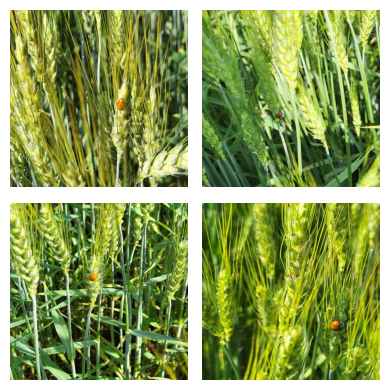

In [10]:
# Displaying the first 4 images in the image list

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 2, figsize=(4, 4))
axs = axs.flatten()  

for i, filename in enumerate(image_list[:4]):
    img_path = os.path.join(image_data, filename)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off') 

plt.tight_layout()
plt.show()

In [29]:
# looking the 5 contents of the labels folder that is in the wheat_coccinellid_data folder

count = 0
for i in os.listdir(label_data):
  print(i)
  count +=1
  if count == 5:
    break;

Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.txt
Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.txt
Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.txt
Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.txt
Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.txt


In [30]:
# looking at the 5 data of each content (text file) of the labels folder

count = 0
for filename in os.listdir(label_data):
  file_path = os.path.join(label_data, filename)
  with open(file_path, 'r') as f:
      content = f.read()
      print(f"Content of {filename}:\n{content}")
      count += 1
      if count == 5: 
        break

Content of Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.txt:
0 0.62734375 0.534375 0.0578125 0.090625
Content of Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.txt:
0 0.43203125 0.59921875 0.04921875 0.04765625
Content of Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.txt:
0 0.471875 0.425 0.06015625 0.04296875
Content of Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.txt:
0 0.759375 0.69375 0.075 0.071875
Content of Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.txt:
0 0.475 0.4328125 0.071875 0.03828125


In [11]:
# looking at the 5 data of each content (text file) of the labels folder in tabular forma

import pandas as pd

label_files = [f for f in os.listdir(label_data)[:5] if f.endswith('.txt')]

data = []
for label_file in label_files:
    label_path = os.path.join(label_data, label_file)
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            data.append(([label_file] + parts))

if data:
    df = pd.DataFrame(data, columns=['filename', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    display(df.head())
          

filename class_id    x_center  \
0  Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed977...        0  0.62734375   
1  Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce...        0  0.43203125   
2  Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340...        0    0.471875   
3  Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6...        0    0.759375   
4  Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a345924...        0       0.475   

     y_center       width      height  
0    0.534375   0.0578125    0.090625  
1  0.59921875  0.04921875  0.04765625  
2       0.425  0.06015625  0.04296875  
3     0.69375       0.075    0.071875  
4   0.4328125    0.071875  0.03828125

In [32]:
# storing the image and label paths in lists

image_filenames = os.listdir(image_data)[:5]

image_paths = [os.path.normpath(os.path.join(image_data, filename)) for filename in image_filenames]
label_paths = [os.path.normpath(os.path.join(label_data, filename.replace('.jpg', '.txt'))) for filename in image_filenames]

print("image paths:", image_paths)
print("\n")
print("label paths:", label_paths)
print("\n")
print("First 5 Image Paths:")
for path in image_paths:
    print(path)

print("\n")
print("First 5 Label Paths:")
for path in label_paths:
    print(path)

image paths: ['wheat_coccinellid_data\\train\\images\\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.jpg', 'wheat_coccinellid_data\\train\\images\\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.jpg', 'wheat_coccinellid_data\\train\\images\\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.jpg', 'wheat_coccinellid_data\\train\\images\\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.jpg', 'wheat_coccinellid_data\\train\\images\\Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.jpg']


label paths: ['wheat_coccinellid_data\\train\\labels\\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.txt', 'wheat_coccinellid_data\\train\\labels\\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.txt', 'wheat_coccinellid_data\\train\\labels\\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.txt', 'wheat_coccinellid_data\\train\\labels\\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.txt', 'wheat_coccinellid_data\\train\\la

In [13]:
# creating a list of tuples containing image and label paths

# List all image files in the images_path directory
image_filenames = [f for f in os.listdir(image_data) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

image_label_pairs = []
for filename in image_filenames:
    image_path = os.path.join(image_data, filename)
    label_filename = filename.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(label_data, label_filename)
    image_label_pairs.append((image_path, label_path))

print("List of tuples following format of(Image path , label path)")
print(image_label_pairs[:5])

print("\n")
print(f" Number of (Image path , label path) pairs : {len(image_label_pairs)}")

List of tuples following format of(Image path , label path)
[('./wheat_coccinellid_data/train/images\\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.jpg', './wheat_coccinellid_data/train/labels\\Wheat_Coccin_0001_jpg.rf.204bf07dd9b0989fed9775c3c14a419f.txt'), ('./wheat_coccinellid_data/train/images\\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.jpg', './wheat_coccinellid_data/train/labels\\Wheat_Coccin_0002_jpg.rf.79dd81f15a0ec68c5a9ce6026006c4da.txt'), ('./wheat_coccinellid_data/train/images\\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.jpg', './wheat_coccinellid_data/train/labels\\Wheat_Coccin_0003_jpg.rf.0e5c4ecf596f18d3b5340f8ef6176f04.txt'), ('./wheat_coccinellid_data/train/images\\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.jpg', './wheat_coccinellid_data/train/labels\\Wheat_Coccin_0004_jpg.rf.ebe653bad5022f0f1cfc6d765b80e955.txt'), ('./wheat_coccinellid_data/train/images\\Wheat_Coccin_0005_jpg.rf.6f6827faa2f252a3459245ee7438eaaf.

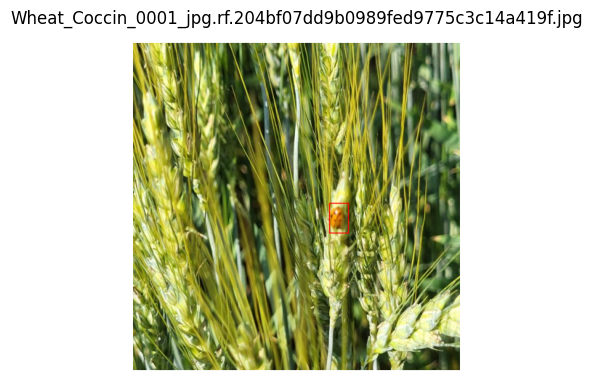

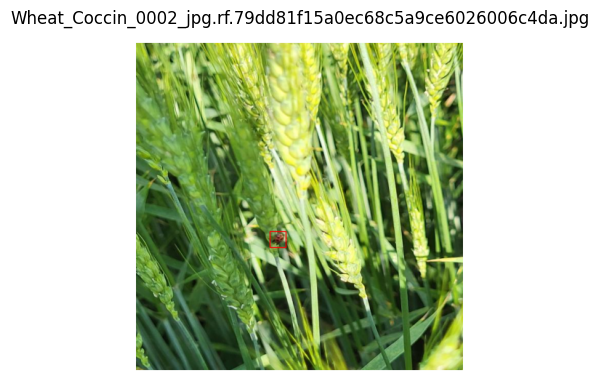

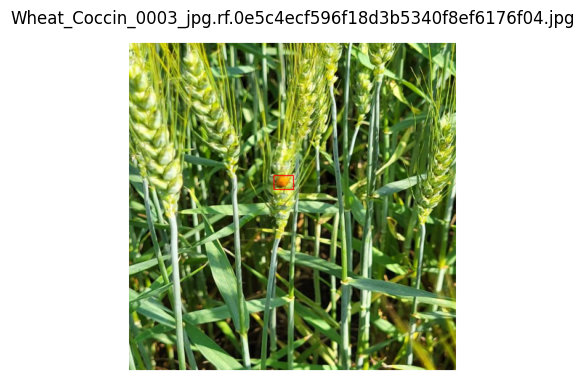

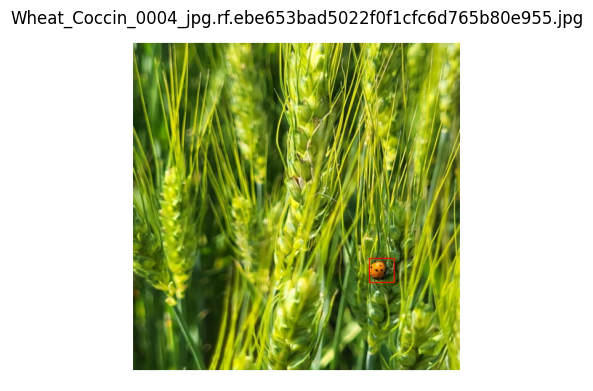

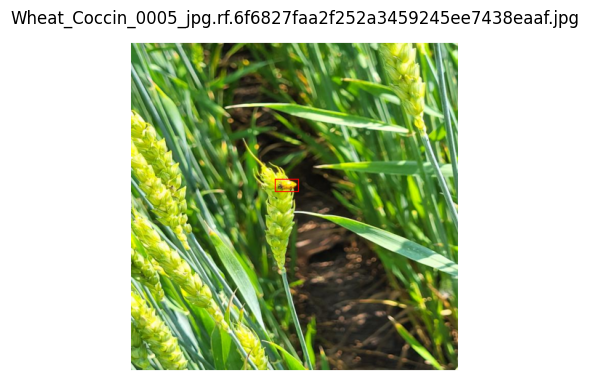

In [14]:
# Drawing bounding boxes based on the label files and displaying the images with bounding boxes

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import io
from PIL import Image

def draw_boxes_on_image(image_path, label_path):
    img = Image.open(image_path).convert("RGB")
    img_width, img_height = img.size

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    x1 = (x_center - width / 2) * img_width
                    y1 = (y_center - height / 2) * img_height
                    box_width = width * img_width
                    box_height = height * img_height
                    rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
                    ax.add_patch(rect)
                   

    ax.set_axis_off()
    plt.tight_layout()
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    annotated_img = Image.open(buf).convert("RGB")
    plt.close(fig)  

    return annotated_img


for img_path, label_path in image_label_pairs[:5]:
    annotated_img = draw_boxes_on_image(img_path, label_path)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(annotated_img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')
    plt.show()

In [38]:
# splitting the image_label_pairs into training, validation, and test sets

from sklearn.model_selection import train_test_split


train_pairs, temp_pairs = train_test_split(image_label_pairs, test_size=0.2, random_state=42)
val_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.5, random_state=42)

print(f"Number of training pairs: {len(train_pairs)}")
print(f"Number of validation pairs: {len(val_pairs)}")
print(f"Number of test pairs: {len(test_pairs)}")

Number of training pairs: 1706
Number of validation pairs: 213
Number of test pairs: 214


In [39]:
# creating a dataset.yaml file for YOLOv8m training configuration

import yaml

train_img_dir = os.path.dirname(train_pairs[0][0])
print(f"Training images directory: {train_img_dir}")
val_img_dir = os.path.dirname(val_pairs[0][0])
test_img_dir = os.path.dirname(test_pairs[0][0])

train_label_dir = os.path.dirname(train_pairs[0][1])
val_label_dir = os.path.dirname(val_pairs[0][1])
test_label_dir = os.path.dirname(test_pairs[0][1])

class_names = ['coccinellid']

data_config = {
    'train': train_img_dir,
    'val': val_img_dir,
    'test': test_img_dir,
    'nc': len(class_names),
    'names': class_names,
    'train_labels': train_label_dir,
    'val_labels': val_label_dir,
    'test_labels': test_label_dir
}

yaml_file_path = os.path.join(os.getcwd(), 'wheat_coccinellid_data.yaml')

with open(yaml_file_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=None)

print(f"Dataset configuration saved to {yaml_file_path}")

Training images directory: ./wheat_coccinellid_data/train/images
Dataset configuration saved to c:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data.yaml


In [41]:
# Creating training_results_folder in a project directory to store training results

dir = Path('output_folder')
dir.mkdir(exist_ok=True)  

output_folder = dir / 'training_results'

In [42]:
# Loading a pretrained YOLOv8m model with the specified configuration

from ultralytics import YOLO

model = YOLO('yolov8m.pt')

results = model.train(data=yaml_file_path, epochs=100, imgsz=640, batch=32, patience= 10, workers = 2,project=output_folder)

100.0%


Ultralytics 8.3.167  Python-3.12.8 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20474MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap

100.0%


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 8.01.2 MB/s, size: 78.3 KB)


train: Scanning C:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data\train\labels... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:03<00:00, 589.17it/s]


train: New cache created: C:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 342.293.9 MB/s, size: 62.9 KB)


val: Scanning C:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data\train\labels.cache... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:00<?, ?it/s]


Plotting labels to output_folder\training_results\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to output_folder\training_results\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.1G      1.958      1.962      1.563         25        640: 100%|██████████| 67/67 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]


                   all       2133       2195   0.000264     0.0702   0.000142   6.47e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.6G      1.947      1.398      1.642         32        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.53it/s]

                   all       2133       2195      0.414      0.104     0.0995     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.7G      1.919      1.382      1.652         27        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]


                   all       2133       2195     0.0144      0.169    0.00463    0.00195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.6G      1.904      1.336      1.624         41        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]


                   all       2133       2195     0.0108    0.00547   0.000695   0.000246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.7G      1.859      1.299        1.6         26        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]


                   all       2133       2195      0.575      0.564      0.527      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.6G      1.803      1.252      1.579         32        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]


                   all       2133       2195      0.748      0.681      0.729      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.7G      1.757      1.213       1.53         34        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.764      0.697      0.738      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.6G      1.764      1.218      1.524         32        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.26it/s]

                   all       2133       2195      0.623      0.447      0.447        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.7G      1.751      1.218      1.508         33        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]


                   all       2133       2195      0.685      0.656      0.643      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.6G      1.768      1.194      1.549         27        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.778      0.737      0.755      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.7G       1.73      1.198      1.514         30        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.784      0.759       0.78      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.6G       1.72      1.145      1.515         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.27it/s]


                   all       2133       2195      0.712      0.612      0.606      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.7G      1.725      1.195      1.519         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       2133       2195      0.718      0.725      0.722      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.6G      1.642      1.142      1.476         28        640: 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       2133       2195      0.787      0.766      0.815      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.7G      1.673      1.119      1.474         42        640: 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]


                   all       2133       2195      0.795      0.775       0.81      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.6G      1.624      1.083      1.463         31        640: 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       2133       2195      0.839      0.785      0.848      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.7G      1.613       1.12      1.466         28        640: 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       2133       2195      0.813      0.756      0.799      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.6G      1.593      1.083      1.432         32        640: 100%|██████████| 67/67 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.29it/s]

                   all       2133       2195      0.795      0.766       0.78      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.7G      1.599      1.095       1.46         29        640: 100%|██████████| 67/67 [37:55<00:00, 33.96s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.26it/s]

                   all       2133       2195      0.762      0.758      0.767      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.6G      1.593      1.083      1.447         34        640: 100%|██████████| 67/67 [00:33<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.832      0.814      0.847       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.7G      1.604      1.058      1.438         29        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.806      0.774      0.813      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.6G      1.581      1.046      1.437         22        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       2133       2195      0.807      0.787      0.827      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.7G      1.589      1.072      1.437         26        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.831      0.795      0.831      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.6G      1.574      1.065      1.425         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.785      0.788      0.815      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.7G       1.59      1.047      1.455         23        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195       0.81      0.769      0.804       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.6G      1.587      1.037      1.416         36        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.823      0.805      0.841      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.7G      1.554      1.046      1.412         36        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.809      0.776      0.817      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.6G      1.566      1.034      1.417         36        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.826      0.784      0.823      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.7G      1.539      1.005      1.384         36        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.822      0.812      0.846      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.6G      1.537      1.035      1.404         37        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.814      0.799      0.833      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.7G      1.558      1.012      1.413         35        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.793      0.798      0.825      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.6G      1.505      1.009      1.379         46        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.819      0.811      0.833       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.7G      1.509      1.006      1.396         32        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.811       0.81      0.834      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.6G      1.498      1.015      1.381         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.829       0.81      0.853      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.7G      1.494      1.005      1.364         33        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195       0.81      0.809      0.842      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.6G      1.514     0.9943      1.392         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.822      0.802      0.835      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.7G      1.491     0.9908      1.381         22        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.824      0.804      0.851      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.6G      1.507      1.004      1.398         24        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195       0.84      0.818      0.855      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.7G      1.462     0.9996      1.363         38        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       2133       2195      0.829      0.802      0.848      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.6G      1.477     0.9602      1.362         30        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.832       0.82      0.857      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.7G      1.446     0.9537       1.36         27        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.829      0.814      0.848      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.6G      1.475     0.9552      1.383         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.845      0.803      0.869      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.7G       1.43     0.9132      1.344         27        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.831      0.815      0.852      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.6G      1.427     0.9509      1.348         37        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195       0.83      0.808      0.852      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.6G      1.451     0.9634      1.351         35        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.842      0.826      0.868      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.6G      1.447     0.9469      1.352         36        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.848      0.827      0.876        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.7G        1.4     0.9409      1.344         35        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.827      0.812      0.857      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.6G      1.437     0.9166      1.342         28        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.841      0.822       0.87      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.7G      1.406     0.9305      1.324         30        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.847      0.794      0.872      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.6G      1.422     0.9371      1.356         41        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.836      0.831      0.871      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.7G      1.423     0.9124      1.338         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.834      0.824      0.853        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.6G      1.404     0.9357      1.327         34        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.846       0.82      0.881      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.7G      1.383     0.9088      1.317         33        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.839      0.827      0.877      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.6G      1.383     0.9117       1.31         29        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.26it/s]

                   all       2133       2195      0.842       0.82       0.87      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.7G      1.388     0.9032      1.318         38        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.827      0.821      0.872      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.6G       1.37     0.8921      1.317         36        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.843      0.808      0.878      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.7G      1.392     0.8762      1.316         37        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.853      0.824      0.879      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.6G      1.355     0.8683      1.318         26        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.835      0.825      0.868      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.7G      1.355     0.8982      1.316         39        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.848      0.825      0.876       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.6G      1.335     0.8839      1.297         31        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       2133       2195      0.856      0.842      0.892      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.7G       1.34     0.8796      1.296         26        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.841      0.834      0.886      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.6G      1.344     0.8866      1.308         29        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.849      0.825       0.88       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.7G      1.322     0.8649      1.297         37        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.845      0.822      0.886       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.6G      1.327     0.8547      1.283         35        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.855      0.829      0.895      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.7G      1.329      0.843      1.286         26        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.853      0.826      0.895       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.6G       1.29      0.852      1.271         35        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       2133       2195      0.846      0.832      0.889       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.7G      1.283     0.8645      1.269         30        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       2133       2195      0.865      0.832      0.894      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.6G      1.289      0.853      1.269         32        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       2133       2195      0.853      0.836      0.894      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.7G      1.273     0.8362      1.278         33        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]

                   all       2133       2195      0.852      0.843      0.904      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.6G      1.288     0.8298      1.264         26        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       2133       2195      0.854      0.817      0.896      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.7G      1.286     0.8155       1.28         24        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       2133       2195      0.853      0.852      0.901      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.6G      1.258     0.8421       1.26         33        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.856      0.834      0.904      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.7G      1.287     0.8233      1.289         30        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.857      0.834      0.901      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.6G      1.276     0.8091      1.278         33        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]

                   all       2133       2195      0.842      0.837      0.905      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.7G      1.263     0.7982      1.266         33        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       2133       2195      0.852      0.842      0.905      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.6G      1.273      0.815      1.266         31        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       2133       2195      0.856      0.845      0.909      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.7G      1.236     0.7931      1.248         26        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.855      0.838      0.906      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.6G      1.256     0.7986      1.251         30        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195      0.857      0.851      0.911      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.7G      1.234     0.7803      1.245         32        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.854      0.839      0.906      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.6G       1.24      0.779      1.253         36        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.856      0.862      0.921      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.7G      1.221     0.7871      1.222         25        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.864      0.848      0.916      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.6G      1.206     0.7716      1.232         25        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]

                   all       2133       2195      0.874      0.843      0.915      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.7G      1.203     0.7683      1.237         31        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.864      0.843      0.913      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.6G      1.204     0.7777      1.219         33        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.843       0.87      0.924      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.7G        1.2     0.7674      1.234         31        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.863      0.854      0.921      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.6G      1.179     0.7497      1.213         30        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.867      0.859      0.925      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.7G       1.17      0.765      1.197         34        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.874      0.856      0.927      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.6G      1.177     0.7277      1.219         28        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.862       0.87      0.927      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.7G      1.168     0.7338      1.205         36        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]

                   all       2133       2195      0.864      0.858      0.925      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.6G      1.185     0.7294      1.196         33        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]

                   all       2133       2195      0.862      0.875      0.934      0.648


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.7G      1.129     0.7092      1.265         23        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]

                   all       2133       2195       0.86       0.86       0.93      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.6G      1.111     0.6931      1.266         22        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.882      0.867      0.936      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.7G       1.08     0.6763       1.23         21        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]

                   all       2133       2195      0.886      0.864      0.939      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.6G      1.106     0.6836      1.254         20        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]

                   all       2133       2195      0.871       0.88      0.939      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.6G      1.094     0.6638      1.239         21        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       2133       2195      0.892      0.862      0.942      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.6G      1.076     0.6628      1.253         22        640: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]

                   all       2133       2195      0.886       0.87      0.944      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.7G      1.064     0.6575      1.237         22        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]

                   all       2133       2195      0.891       0.87      0.944      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.6G      1.073     0.6572      1.231         21        640: 100%|██████████| 67/67 [00:33<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       2133       2195      0.894       0.87      0.946      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.7G      1.058     0.6491      1.226         20        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]

                   all       2133       2195       0.89      0.869      0.945      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.6G      1.057     0.6458      1.233         20        640: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       2133       2195      0.895      0.873      0.947      0.678



100 epochs completed in 2.014 hours.
Optimizer stripped from output_folder\training_results\train\weights\last.pt, 52.0MB
Optimizer stripped from output_folder\training_results\train\weights\best.pt, 52.0MB

Validating output_folder\training_results\train\weights\best.pt...
Ultralytics 8.3.167  Python-3.12.8 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20474MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]


                   all       2133       2195      0.895      0.873      0.947      0.679
Speed: 0.1ms preprocess, 4.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to output_folder\training_results\train


In [43]:
# evaluating the trained model on the validation dataset defined in wheat_coccinellid_data.yaml

best_model_path = "./output_folder/training_results/train/weights/best.pt"
val_output_folder = "./output_folder/evaluation_results_on_validation_data" 

model = YOLO(best_model_path)
results = model.val(data=yaml_file_path, project=val_output_folder, name='valid_image_evaluation')

print("Evaluation Results:")
print(f"  mAP50: {results.results_dict['metrics/mAP50(B)']}")
print(f"  mAP50-95: {results.results_dict['metrics/mAP50-95(B)']}")
print(f"  Precision: {results.results_dict['metrics/precision(B)']}")
print(f"  Recall: {results.results_dict['metrics/recall(B)']}")

Ultralytics 8.3.167  Python-3.12.8 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20474MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 275.6138.8 MB/s, size: 87.7 KB)


val: Scanning C:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data\train\labels.cache... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:22<00:00,  5.92it/s]


                   all       2133       2195      0.894      0.873      0.947      0.679
Speed: 0.2ms preprocess, 7.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to output_folder\evaluation_results_on_validation_data\valid_image_evaluation
Evaluation Results:
  mAP50: 0.9467145951173309
  mAP50-95: 0.6786101269865404
  Precision: 0.8939159843662821
  Recall: 0.8728929384965831


In [ ]:
f1 = 2 * (results.results_dict['metrics/precision(B)'] * results.results_dict['metrics/recall(B)']) / (results.results_dict['metrics/precision(B)'] + results.results_dict['metrics/recall(B)'])
print(f"F1-Score: {f1}")

# formula to calcuate F1 score
# F1 = 2 * (Precision * Recall) / (Precision + Recall)

F1-Score: 0.8832793860902567


Based on the above evaluation metrics, it is seen that the model detects 94.6% of coccinellid correctly in the wheat image at IOU 0.5. It also performs well (67.8%) on thresholds between 0.5 to 0.95. Having higher precision (89.3%) confirms that out of 100 coccinellid predictions, 89 predictions are correct claiming the model rarely makes the false detections and with higher recall (87.2) it shows that out of 100 coccinellid truth, model got 87 right, showcasing the model finds almost all coccinellid. F1-Score is 88.3% meaning predictions are mostly correct (precision) and model is able to detect most of the coccinellid (recall). Overall, model is accuately detecting the coccinellid.

Tip: For precision, think about predictions as base and for recall, think about truth as your base. F1 score gives the overall performance of the model.


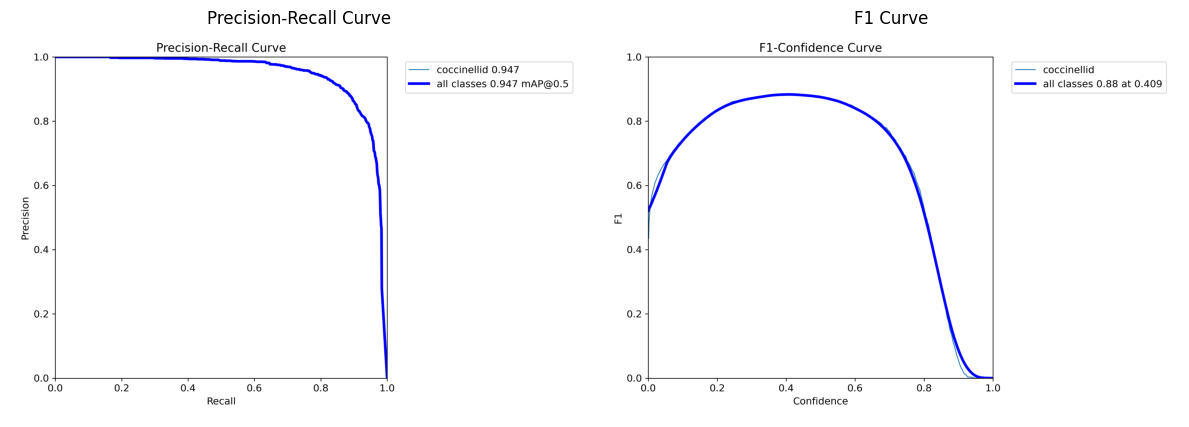

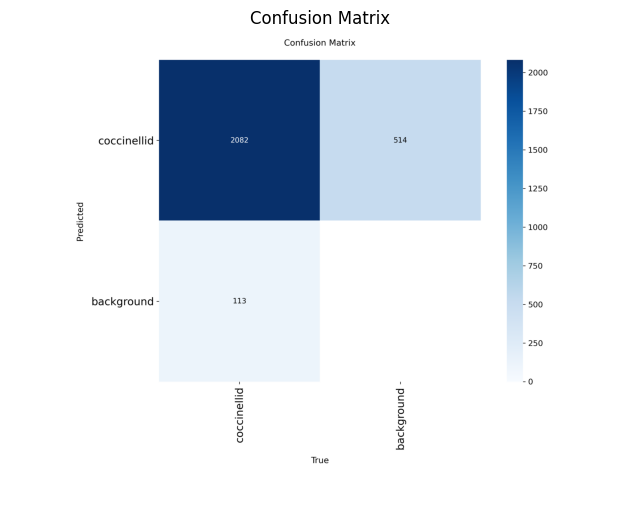

In [51]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, classification_report


val_output_folder = "./output_folder/evaluation_results_on_validation_data/valid_image_evaluation" 

try:
    pr_curve_path = os.path.join(val_output_folder, 'BoxPR_curve.png') 

    fig, axes = plt.subplots(1, 2, figsize=(12, 12)) 
    if os.path.exists(pr_curve_path):
        img = mpimg.imread(pr_curve_path)
        axes[0].imshow(img)
        axes[0].set_title("Precision-Recall Curve")
        axes[0].axis('off')
    else:
        print("\nPrecision-Recall Curve plot not found.")
        fig.delaxes(axes[0])  

    f1_curve_path = os.path.join(val_output_folder, 'BoxF1_curve.png') 
    if os.path.exists(f1_curve_path):
        img = mpimg.imread(f1_curve_path)
        axes[1].imshow(img)
        axes[1].set_title("F1 Curve")
        axes[1].axis('off')
    else:
        print("\nF1 Curve plot not found.")
        fig.delaxes(axes[1])
    
    plt.tight_layout()
    plt.show()
    
    confusion_matrix_path = os.path.join(val_output_folder, 'confusion_matrix.png')
    if os.path.exists(confusion_matrix_path):
        img = mpimg.imread(confusion_matrix_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.title("Confusion Matrix")
        plt.axis('off')
        plt.show()
    else:
        print("\nConfusion Matrix plot not found.")

except FileNotFoundError:
    print(f"\nError: The directory {val_output_folder} was not found.")
    print("Please ensure the 'val_results_dir' is correct and that the validation step completed successfully.")
except Exception as e:
    print(f"\nAn error occurred while trying to display the plots: {e}")

Confusion Matrix

In case of confusion matrix, truth and prediction is supplied. In x-axis, there is truth and in y-axis, there is prediction. In the conusion matrx, we see that 2082 times model had a coccinellid as a truth and model predicted to be a coccinellid. So, 2082 times model got it right. Besides that, although 514 times it was a background, model predicted it as a coccinellid. Similarly, 113 times it was a coccinellid, but model predicted it as a background. So, data 514 and 113 is an error.

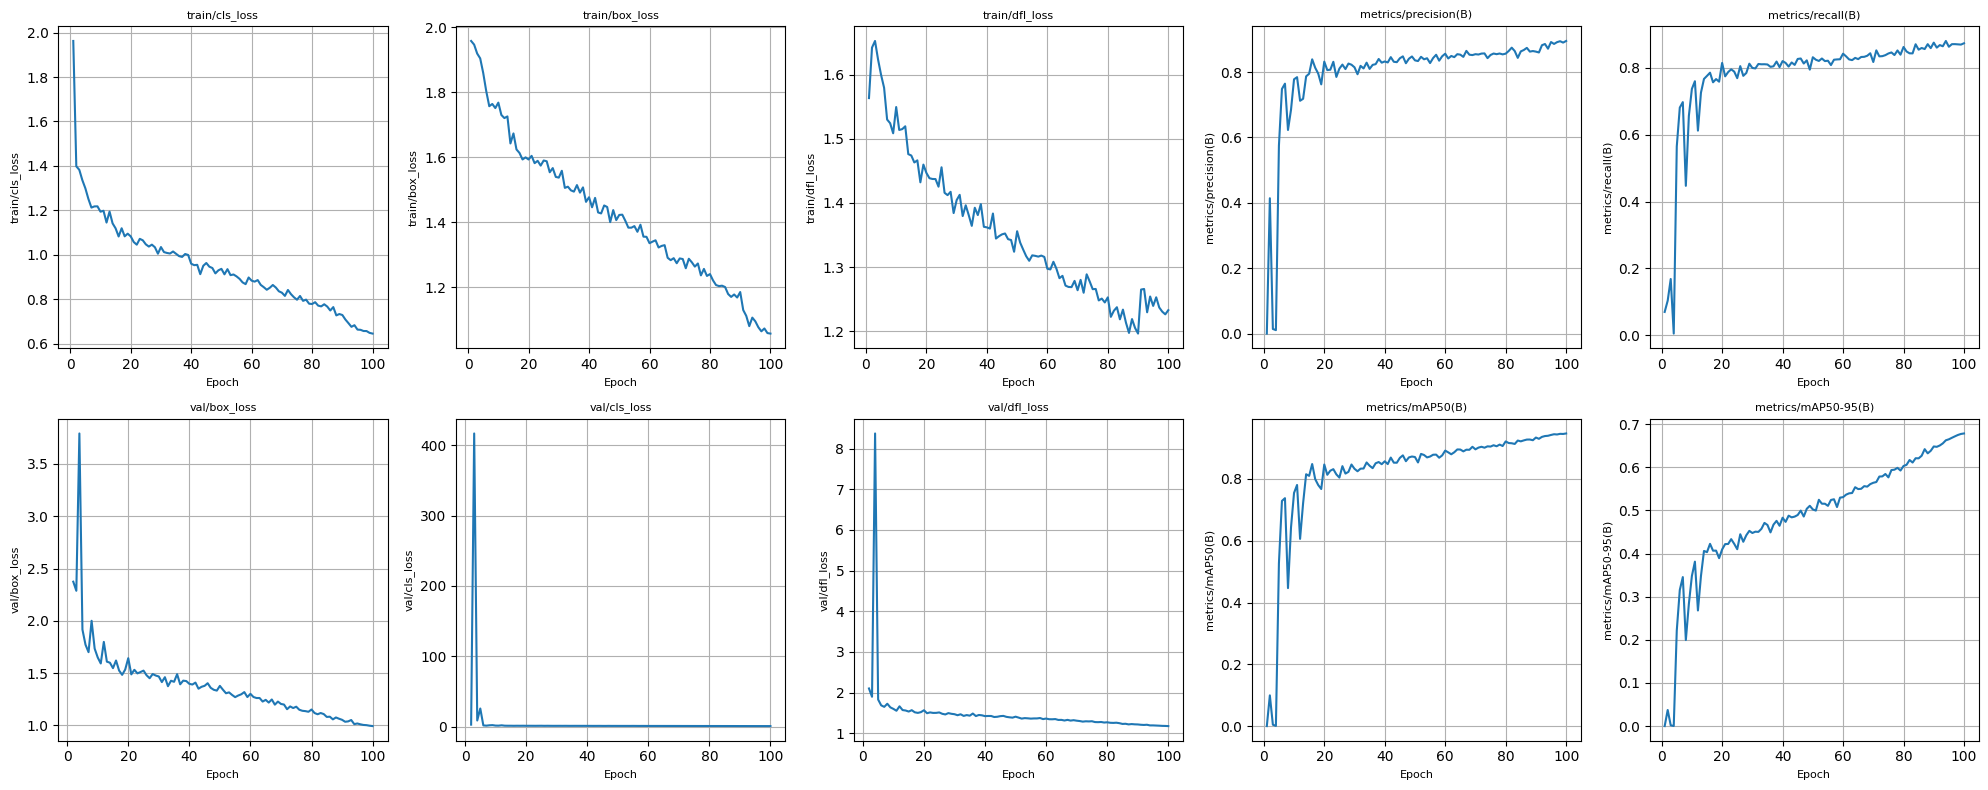

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

output_dir = "./output_folder/training_results" 
history_path = os.path.join(output_dir, 'train', 'results.csv') 

try:
    # Read the results.csv file into a pandas DataFrame
    history_df = pd.read_csv(history_path)

    # Define the metrics to plot
    metrics_to_plot = [
        'train/cls_loss',
        'train/box_loss',
        'train/dfl_loss',
        'metrics/precision(B)',
        'metrics/recall(B)',
        'val/box_loss',
        'val/cls_loss',
        'val/dfl_loss',
        'metrics/mAP50(B)',
        'metrics/mAP50-95(B)'
    ]

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    # Create a separate plot for each metric
    for i, metric in enumerate(metrics_to_plot):
        if metric in history_df.columns:
            axes[i].plot(history_df['epoch'], history_df[metric])
            axes[i].set_title(metric, fontsize=8)
            axes[i].set_xlabel('Epoch', fontsize=8)
            axes[i].set_ylabel(metric, fontsize=8)
            axes[i].grid(True)
        else:
            print(f"Warning: Metric '{metric}' not found in the results.csv file.")
            fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file {history_path} was not found.")
    print("Please ensure the training completed successfully and the 'results.csv' file was saved in the correct location.")
except Exception as e:
    print(f"Could not plot training history. Error: {e}")
    print("Please check the contents and format of the results.csv file.")

In [54]:
# Using test data on the model to evaluate the performance

best_model_path = "./output_folder/training_results/train/weights/best.pt"
val_output_folder = "./output_folder/evaluation_results_on_test_data" 

# Load the trained model
model = YOLO(best_model_path)

# Evaluate the model on the test set and save results to Google Drive
# The 'data' argument specifies the path to the dataset configuration file
results = model.val(data=yaml_file_path, project=val_output_folder, split = 'test', name='test_evaluation')

# The results object contains evaluation metrics. You can print them.
print("Evaluation Results:")
print(f"  mAP50: {results.results_dict['metrics/mAP50(B)']}")
print(f"  mAP50-95: {results.results_dict['metrics/mAP50-95(B)']}")
print(f"  Precision: {results.results_dict['metrics/precision(B)']}")
print(f"  Recall: {results.results_dict['metrics/recall(B)']}")

f1 = 2 * (results.results_dict['metrics/precision(B)'] * results.results_dict['metrics/recall(B)']) / (results.results_dict['metrics/precision(B)'] + results.results_dict['metrics/recall(B)'])
print(f"F1-Score: {f1}")

Ultralytics 8.3.167  Python-3.12.8 torch-2.7.1+cu128 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20474MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 450.1125.9 MB/s, size: 78.9 KB)


val: Scanning C:\Users\SauravUpadhyaya\Desktop\wheat-insect-detection\wheat_coccinellid_data\train\labels.cache... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:22<00:00,  6.06it/s]


                   all       2133       2195      0.894      0.873      0.947      0.679
Speed: 0.2ms preprocess, 8.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to output_folder\evaluation_results_on_test_data\test_evaluation
Evaluation Results:
  mAP50: 0.9467145951173309
  mAP50-95: 0.6786101269865404
  Precision: 0.8939159843662821
  Recall: 0.8728929384965831
F1-Score: 0.8832793860902567



0: 640x640 1 coccinellid, 21.4ms
1: 640x640 1 coccinellid, 21.4ms
2: 640x640 2 coccinellids, 21.4ms
3: 640x640 1 coccinellid, 21.4ms
4: 640x640 1 coccinellid, 21.4ms
5: 640x640 1 coccinellid, 21.4ms
6: 640x640 1 coccinellid, 21.4ms
7: 640x640 1 coccinellid, 21.4ms
8: 640x640 1 coccinellid, 21.4ms
9: 640x640 1 coccinellid, 21.4ms
Speed: 2.7ms preprocess, 21.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


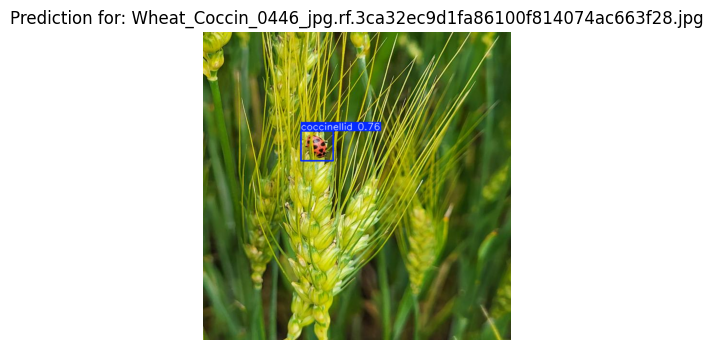

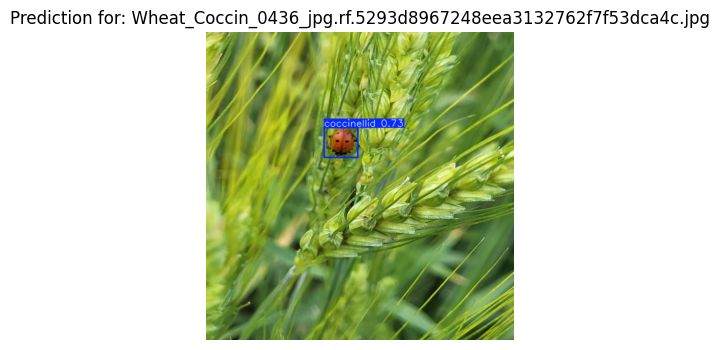

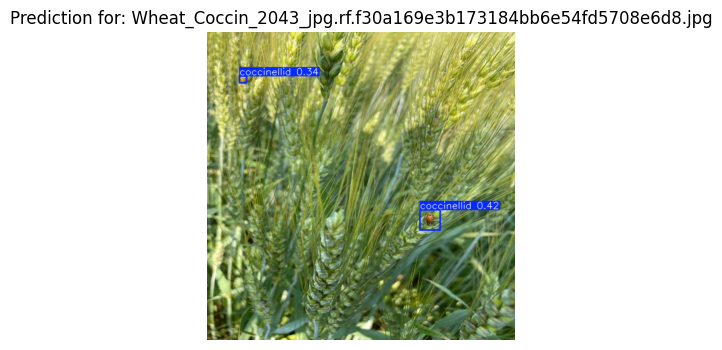

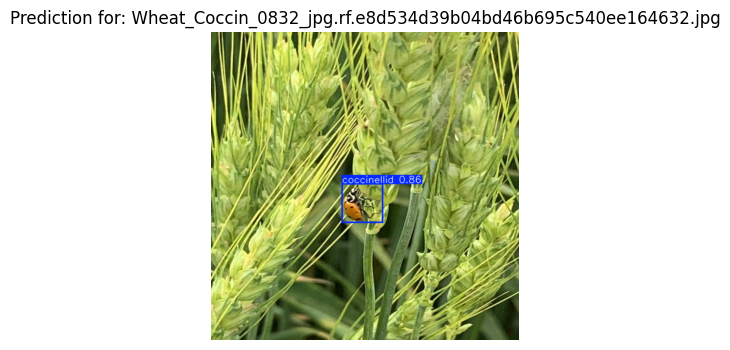

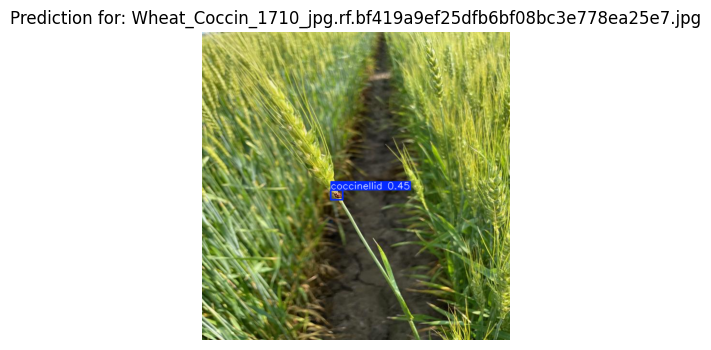

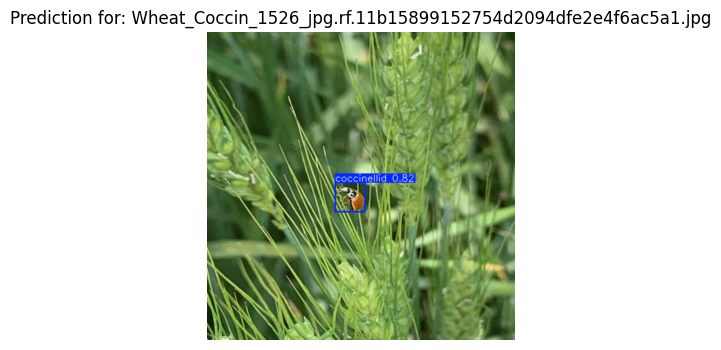

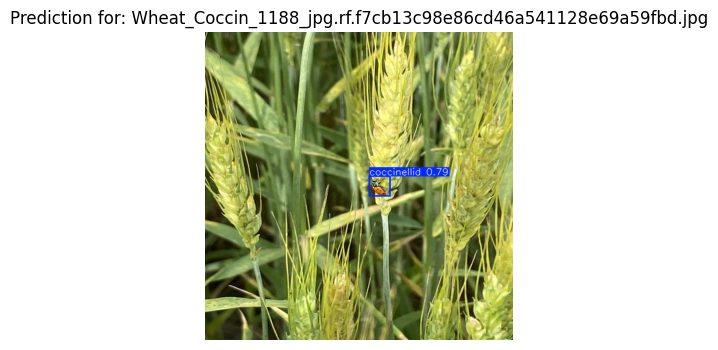

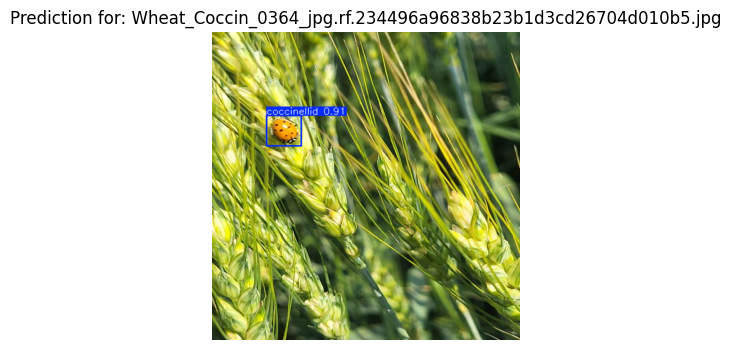

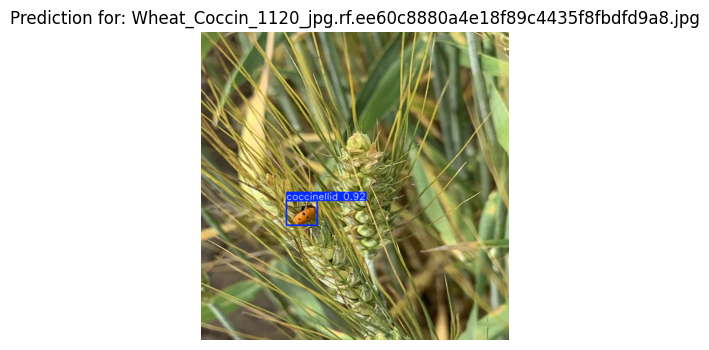

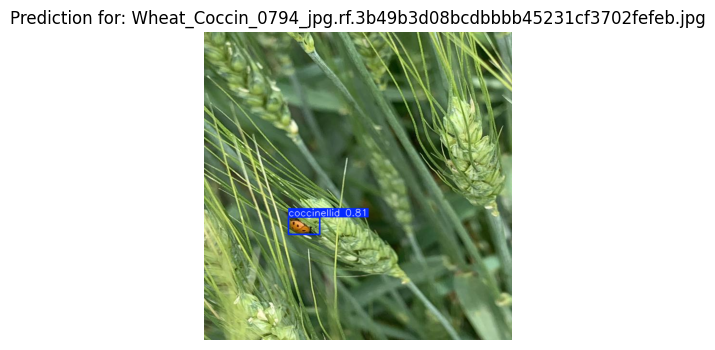

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image # Import the Image class

best_model_path = "./output_folder/training_results/train/weights/best.pt"

model = YOLO(best_model_path)

custom_iou_threshold = 0.3
if 'test_pairs' in locals() and len(test_pairs) >= 10:
    test_image_paths = [pair[0] for pair in test_pairs[:10]]
else:
    print("Not enough test images available or 'test_pairs' list is not defined.")
    test_image_paths = []

# Run inference on the selected test images
if test_image_paths:
    results = model(test_image_paths, iou = custom_iou_threshold)

    for i, result in enumerate(results):
        im_array = result.plot()  
        im = Image.fromarray(im_array[..., ::-1])  

        plt.figure(figsize=(4, 4))
        plt.imshow(im)
        plt.title(f"Prediction for: {os.path.basename(test_image_paths[i])}")
        plt.axis('off')
        plt.show()

else:
    print("Could not run inference as no test images were selected.")
    

Result analysis and conclusion:

Based on the result of the YOLOv8m model, it is seen that the model detects 94.6% of coccinellid correctly in the wheat image at IOU 0.5. Also, it performs well (67.8%) on thresholds between 0.5 to 0.95. Having higher precision (89.3%) confirms that out of 100 coccinellid predictions, 89 predictions are correct claiming the model rarely makes the false detection and with higher recall it shows that out of 100 coccinellid truth, model got 87 right, showcasing the model finds almost all coccinellid. F1-Score is 88.3% meaning predictions are mostly correct (precision) and the model is able to detect most of the coccinellid (recall). Overall, the model is accurately detecting the coccinellid.

In this research, coccinellid detection was successfully performed on wheat plant images using the YOLOv8m model.  The research was done in visual studio code supported by NVIDIA RTX 4000 Ada Generation (professional workstation GPU), which improved the training time by 33% compared to colab. Our selected model demonstrated the strong performance accurately identifying and localizing the coccinellids within the plant datasets.
